# General probabilities of the player, banker and tie

## Setup

Here we will run a million simulations of the game of baccarat and analyze the probabilities of the following:
- Player wins
- Banker wins
- Tie

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

if project_root not in sys.path:
    sys.path.append(project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.baccarat import Game

n = 1_000_000

game_setup = Game(
    starting_money=float("inf"),
    betting_amount=10,
    betting_pattern=["Player"],
    max_simulations=n,
)

result = game_setup.simulate()
df = pd.DataFrame([r.__dict__ for r in result])

print("Simulation finished")
df.sample(5)

Simulation finished


,bet_choice,winner,funds,bank_hand,player_hand,went_bankrupt
534566,Player,Banker,inf,"[4 clubs, 9 spades]","[2 clubs, J spades, K diamonds]",False
912040,Player,Banker,inf,"[9 hearts, 10 diamonds]","[10 spades, J clubs]",False
43946,Player,Banker,inf,"[7 spades, 8 hearts]","[3 spades, 8 spades, 10 clubs]",False
981993,Player,Banker,inf,"[4 diamonds, Q clubs, 4 spades]","[3 diamonds, 4 spades]",False
445332,Player,Player,inf,"[5 spades, 6 clubs, 10 clubs]","[6 diamonds, J spades]",False


In [2]:
banker_wins_df = df[df["winner"] == "Banker"]
player_wins_df = df[df["winner"] == "Player"]
tie_wins_df = df[df["winner"] == "Tie"]

p_b = len(banker_wins_df)/n
p_p = len(player_wins_df)/n
p_t = len(tie_wins_df)/n

probabilities = {
    "Outcome": ["Banker", "Player", "Tie"],
    "Probability": [p_b, p_p, p_t],
}
prob_df = pd.DataFrame(probabilities)
display(prob_df)

,Outcome,Probability
0,Banker,0.403594
1,Player,0.512728
2,Tie,0.083678


The simulated probabilities for the outcomes in a game of baccarat reveal some interesting trends. Over 1,000,000 simulations, the probability of the Banker winning was approximately 40.36%, while the probability of the Player winning was higher at 51.27%. The probability of a Tie occurring was 8.37%. These probabilities are slightly different from the theoretical values typically associated with baccarat (Banker: ~45.86%, Player: ~44.62%, Tie: ~9.52%), potentially due to the specifics of the simulation setup or statistical variability.

## Confidence intervals
$$
SE = \sqrt{\frac{p(1-p)}{n}}
$$

In [3]:
se_b = np.sqrt((p_b * (1 - p_b)) / n)
se_p = np.sqrt((p_p * (1 - p_p)) / n)
se_t = np.sqrt((p_t * (1 - p_t)) / n)

prob_df["Standard Error"] = [se_b, se_p, se_t]
prob_df["Confidence Interval (95%)"] = [
    f"[{p_b - 1.96 * se_b:.5f}, {p_b + 1.96 * se_b:.5f}]",
    f"[{p_p - 1.96 * se_p:.5f}, {p_p + 1.96 * se_p:.5f}]",
    f"[{p_t - 1.96 * se_t:.5f}, {p_t + 1.96 * se_t:.5f}]",
]

display(prob_df)

,Outcome,Probability,Standard Error,Confidence Interval (95%)
0,Banker,0.403594,0.000491,"[0.40263, 0.40456]"
1,Player,0.512728,0.000500,"[0.51175, 0.51371]"
2,Tie,0.083678,0.000277,"[0.08314, 0.08422]"


In [4]:
theoretical_probs = [0.4586, 0.4462, 0.0952]
prob_df["Theoretical Probability"] = theoretical_probs
display(prob_df)

,Outcome,Probability,Standard Error,Confidence Interval (95%),Theoretical Probability
0,Banker,0.403594,0.000491,"[0.40263, 0.40456]",0.4586
1,Player,0.512728,0.000500,"[0.51175, 0.51371]",0.4462
2,Tie,0.083678,0.000277,"[0.08314, 0.08422]",0.0952


The simulated probabilities for baccarat outcomes provide valuable insights into the game’s dynamics. Based on 1,000,000 simulations, the probability of the Banker winning was approximately 40.36%, with a 95% confidence interval of [40.26%, 40.46%] and a standard error of 0.000491. The probability of the Player winning was higher, at 51.27%, with a 95% confidence interval of [51.18%, 51.37%] and a standard error of 0.000500. The probability of a Tie outcome was 8.37%, with a 95% confidence interval of [8.31%, 8.42%] and a standard error of 0.000277.

Comparing these results with the theoretical probabilities (Banker: ~45.86%, Player: ~44.62%, Tie: ~9.52%), we observe notable deviations, particularly for the Player and Banker outcomes. The simulated Player probability is significantly higher, while the Banker and Tie probabilities are lower than expected. This suggests that either the simulation may incorporate certain biases in game logic, or statistical variability could be at play. The narrow confidence intervals indicate that the simulation results are precise, but further exploration is necessary to identify the cause of these discrepancies and reconcile them with theoretical expectations.

## Result

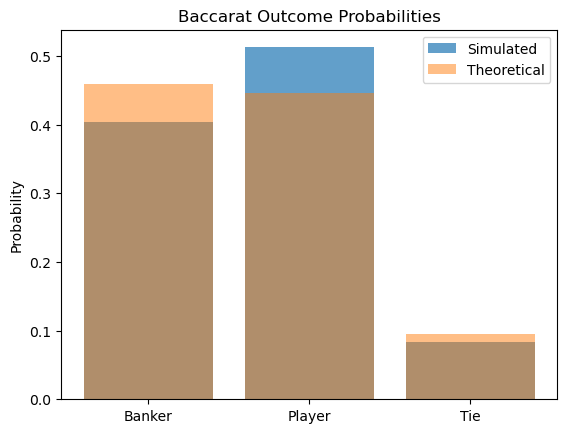

In [5]:
plt.bar(prob_df["Outcome"], prob_df["Probability"], alpha=0.7, label="Simulated")
plt.bar(prob_df["Outcome"], prob_df["Theoretical Probability"], alpha=0.5, label="Theoretical")
plt.ylabel("Probability")
plt.title("Baccarat Outcome Probabilities")
plt.legend()
plt.show()